### Introduction to Regression with Neural Network in TensorFlow
> Regression analysis is process of predicting the relationship between dependents and independents variable


>Regression problem is the process of predicting a numerical variable based on some other combination of variable or predicting a number

### Import TensorFlow
> Using tensorflow as tf

In [1]:
import tensorflow as tf

### Creating data to view and fit

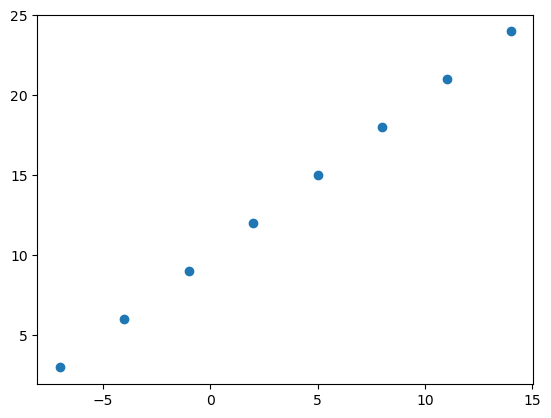

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create feactures
X = np.array([-7.0,-4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualise it
plt.scatter(X, y)

In [3]:
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [5]:
# Example reshaping for time series data
X = X.reshape((X.shape[0], X.shape[1], 1))


AttributeError: EagerTensor object has no attribute 'reshape'. 
        If you are looking for numpy-related methods, please run the following:
        tf.experimental.numpy.experimental_enable_numpy_behavior()
      

### Steps in modelling with TensorFlow

> 1. Creating a model : Define the iput and output layers, as well the hidden layer of a deep learning model

> 2. Compiling the model: 
    >* a.Define the loss function : This tell how wrong it          is the model 
    >* b. The optimizer : Tells our model how to improve the patterns its learning
    >* c. Evaluation metrics : What can we use to interpret the performance of the model
   
> 3. Fitting a model:  Letting the model try to find pattern X, y (features and label) 

In [6]:
# set random seed
tf.random.set_seed(42)

# create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model 
model.compile(
    loss = tf.keras.losses.mae, # mae : mean absolute error
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 5)



Epoch 1/5


1/1 [==============================] - 1s 1s/step - loss: 9.5165 - mae: 9.5165
Epoch 2/5
1/1 [==============================] - 0s 32ms/step - loss: 9.3840 - mae: 9.3840
Epoch 3/5
1/1 [==============================] - 0s 36ms/step - loss: 9.2515 - mae: 9.2515
Epoch 4/5
1/1 [==============================] - 0s 28ms/step - loss: 9.1190 - mae: 9.1190
Epoch 5/5
1/1 [==============================] - 0s 21ms/step - loss: 8.9865 - mae: 8.9865


In [7]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
# try and make prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 451ms/step


array([[22.373188]], dtype=float32)

### How to improve our model
> we can improve our model by altering the steps we took to create a model
>* Create a model : here we might add more layers, increase the number of hidden units  (all called neurous) within eash of the hidden layers , change the activation function of eash layer

>* Compiling a model: Here we might change the optimization function or perhaps the *learning rate* of the optimization function

>* fitting a model: Here we might fit a model for more epochs (leave it training for longer) or on more data (give the model examples to learnfrom

In [12]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
                              tf.keras.layers.Dense(50, activation="relu"),
                              tf.keras.layers.Dense(50, activation="relu"),
                              tf.keras.layers.Dense(50, activation="relu"),
                              tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
               metrics = ["mae"])

model1.fit(tf.expand_dims(X, axis=-1), y, epochs=300)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 12.4341 - mae: 12.4341
Epoch 2/300
1/1 [==============================] - 0s 20ms/step - loss: 12.2677 - mae: 12.2677
Epoch 3/300
1/1 [==============================] - 0s 22ms/step - loss: 12.1012 - mae: 12.1012
Epoch 4/300
1/1 [==============================] - 0s 19ms/step - loss: 11.9352 - mae: 11.9352
Epoch 5/300
1/1 [==============================] - 0s 20ms/step - loss: 11.7647 - mae: 11.7647
Epoch 6/300
1/1 [==============================] - 0s 15ms/step - loss: 11.5890 - mae: 11.5890
Epoch 7/300
1/1 [==============================] - 0s 14ms/step - loss: 11.4108 - mae: 11.4108
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 11.2282 - mae: 11.2282
Epoch 9/300
1/1 [==============================] - 0s 21ms/step - loss: 11.0832 - mae: 11.0832
Epoch 10/300
1/1 [==============================] - 0s 21ms/step - loss: 10.9422 - mae: 10.9422
Epoch 11/300
1/1 [==============================] -

Epoch 88/300
1/1 [==============================] - 0s 17ms/step - loss: 3.4278 - mae: 3.4278
Epoch 89/300
1/1 [==============================] - 0s 17ms/step - loss: 3.4144 - mae: 3.4144
Epoch 90/300
1/1 [==============================] - 0s 14ms/step - loss: 3.3956 - mae: 3.3956
Epoch 91/300
1/1 [==============================] - 0s 19ms/step - loss: 3.3721 - mae: 3.3721
Epoch 92/300
1/1 [==============================] - 0s 18ms/step - loss: 3.3428 - mae: 3.3428
Epoch 93/300
1/1 [==============================] - 0s 25ms/step - loss: 3.3505 - mae: 3.3505
Epoch 94/300
1/1 [==============================] - 0s 19ms/step - loss: 3.3511 - mae: 3.3511
Epoch 95/300
1/1 [==============================] - 0s 16ms/step - loss: 3.3398 - mae: 3.3398
Epoch 96/300
1/1 [==============================] - 0s 17ms/step - loss: 3.3151 - mae: 3.3151
Epoch 97/300
1/1 [==============================] - 0s 14ms/step - loss: 3.2792 - mae: 3.2792
Epoch 98/300
1/1 [==============================] - 0s 18ms/

1/1 [==============================] - 0s 17ms/step - loss: 0.6155 - mae: 0.6155
Epoch 175/300
1/1 [==============================] - 0s 35ms/step - loss: 0.5938 - mae: 0.5938
Epoch 176/300
1/1 [==============================] - 0s 11ms/step - loss: 0.5215 - mae: 0.5215
Epoch 177/300
1/1 [==============================] - 0s 23ms/step - loss: 0.4808 - mae: 0.4808
Epoch 178/300
1/1 [==============================] - 0s 17ms/step - loss: 0.4852 - mae: 0.4852
Epoch 179/300
1/1 [==============================] - 0s 42ms/step - loss: 0.4921 - mae: 0.4921
Epoch 180/300
1/1 [==============================] - 0s 16ms/step - loss: 0.4533 - mae: 0.4533
Epoch 181/300
1/1 [==============================] - 0s 24ms/step - loss: 0.3635 - mae: 0.3635
Epoch 182/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5510 - mae: 0.5510
Epoch 183/300
1/1 [==============================] - 0s 11ms/step - loss: 0.4233 - mae: 0.4233
Epoch 184/300
1/1 [==============================] - 0s 17ms/ste

1/1 [==============================] - 0s 15ms/step - loss: 0.1183 - mae: 0.1183
Epoch 261/300
1/1 [==============================] - 0s 12ms/step - loss: 0.1721 - mae: 0.1721
Epoch 262/300
1/1 [==============================] - 0s 14ms/step - loss: 0.2400 - mae: 0.2400
Epoch 263/300
1/1 [==============================] - 0s 9ms/step - loss: 0.1383 - mae: 0.1383
Epoch 264/300
1/1 [==============================] - 0s 16ms/step - loss: 0.1340 - mae: 0.1340
Epoch 265/300
1/1 [==============================] - 0s 15ms/step - loss: 0.2079 - mae: 0.2079
Epoch 266/300
1/1 [==============================] - 0s 14ms/step - loss: 0.1262 - mae: 0.1262
Epoch 267/300
1/1 [==============================] - 0s 15ms/step - loss: 0.1107 - mae: 0.1107
Epoch 268/300
1/1 [==============================] - 0s 17ms/step - loss: 0.1800 - mae: 0.1800
Epoch 269/300
1/1 [==============================] - 0s 18ms/step - loss: 0.0926 - mae: 0.0926
Epoch 270/300
1/1 [==============================] - 0s 16ms/step

In [13]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
model.predict([17])

1/1 [==============================] - 0s 400ms/step


array([[22.373188]], dtype=float32)

In [22]:
# let rebuild our model
# create the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# fit the model (this time we ll train for longer )
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 90)

Epoch 1/90
1/1 [==============================] - 1s 858ms/step - loss: 15.6316 - mae: 15.6316
Epoch 2/90
1/1 [==============================] - 0s 19ms/step - loss: 15.3503 - mae: 15.3503
Epoch 3/90
1/1 [==============================] - 0s 21ms/step - loss: 15.0691 - mae: 15.0691
Epoch 4/90
1/1 [==============================] - 0s 17ms/step - loss: 14.8473 - mae: 14.8473
Epoch 5/90
1/1 [==============================] - 0s 14ms/step - loss: 14.7148 - mae: 14.7148
Epoch 6/90
1/1 [==============================] - 0s 14ms/step - loss: 14.5823 - mae: 14.5823
Epoch 7/90
1/1 [==============================] - 0s 20ms/step - loss: 14.4498 - mae: 14.4498
Epoch 8/90
1/1 [==============================] - 0s 20ms/step - loss: 14.3173 - mae: 14.3173
Epoch 9/90
1/1 [==============================] - 0s 18ms/step - loss: 14.1848 - mae: 14.1848
Epoch 10/90
1/1 [==============================] - 0s 15ms/step - loss: 14.0523 - mae: 14.0523
Epoch 11/90
1/1 [==============================] - 0s 18ms

1/1 [==============================] - 0s 18ms/step - loss: 6.9000 - mae: 6.9000
Epoch 89/90
1/1 [==============================] - 0s 18ms/step - loss: 6.8944 - mae: 6.8944
Epoch 90/90
1/1 [==============================] - 0s 19ms/step - loss: 6.8888 - mae: 6.8888


In [25]:
model.predict([17])

1/1 [==============================] - 0s 351ms/step


array([[29.274256]], dtype=float32)

In [26]:
### Evaluating a model

> 


SyntaxError: invalid syntax (2961561652.py, line 3)

In [27]:
# making a bigger datset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [29]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

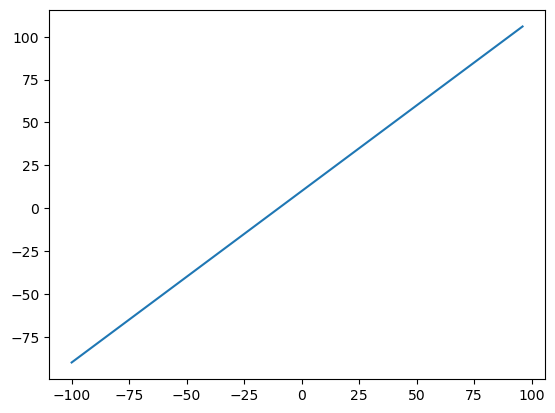

In [31]:
# visualize the data
plt.plot(X, y)

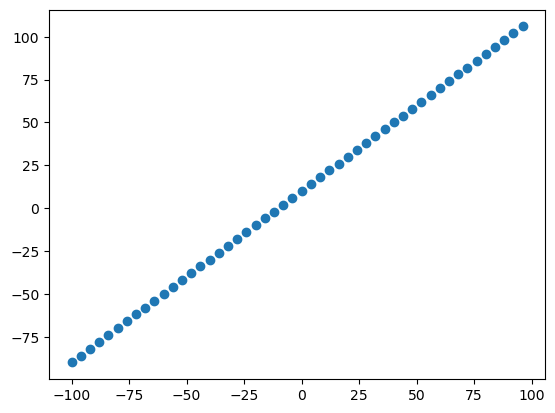

In [32]:
# visualize
plt.scatter(X, y)

In [33]:
len(X)

50

In [48]:
### the 3 sets ...
X_train = X[:40] # first 40 are training samples 
y_train = y[:40]



X_test = X[40:] # last 10 are testing samples 
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize the dateset in split model


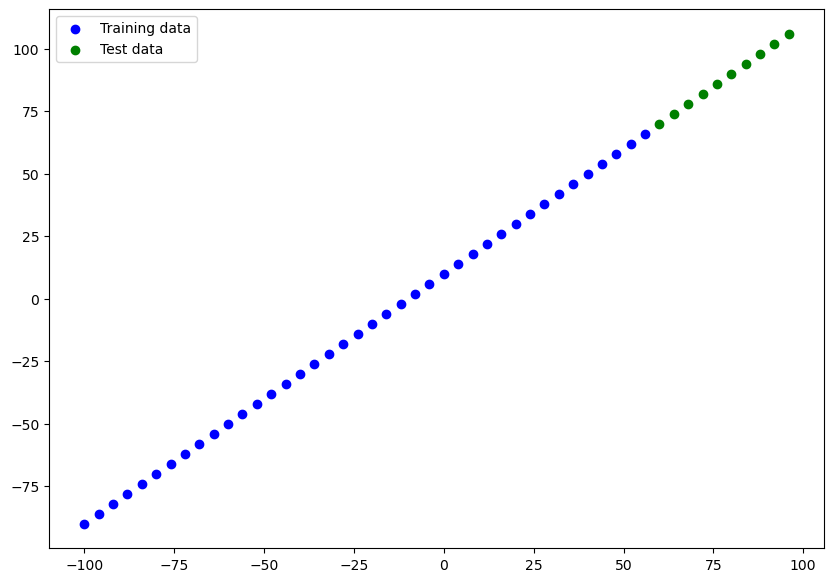

In [49]:
plt.figure(figsize = (10, 7))

plt.scatter (X_train, y_train, c= "b" , label = "Training data" )

plt.scatter(X_test, y_test, c = "g", label = "Test data")

plt.legend()

In [86]:
# Let's have a look at how biuld model

# create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# we compile the model
model.compile(
    loss = tf.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# fit te model
# model.fit(X_train, y_trian, epochs = 100)

In [87]:
# create a model 
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

# we compile the model
model.compile(
    loss = tf.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [88]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
!conda install python-graphviz



^C


In [90]:
!pip install pydot
!sudo apt-get update
!sudo apt-get install graphviz


^C


'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [91]:
from tensorflow.keras.utils import plot_model

plot_model(model = model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [126]:
# fit te model
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 19s 34ms/step - loss: 9.1211 - mae: 9.1211
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 6.3387 - mae: 6.3387
Epoch 3/100
2/2 [==============================] - 0s 19ms/step - loss: 9.2820 - mae: 9.2820
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 7.7160 - mae: 7.7160
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6951 - mae: 8.6951
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 7.8573 - mae: 7.8573
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 7.0050 - mae: 7.0050
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 7.1725 - mae: 7.1725
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 18.3938 - mae: 18.3938
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 8.0673 - mae: 8.0673
Epoch 11/100
2/2 [==============================] - 0s 10ms/step - 

2/2 [==============================] - 0s 24ms/step - loss: 7.1452 - mae: 7.1452
Epoch 88/100
2/2 [==============================] - 0s 23ms/step - loss: 13.4867 - mae: 13.4867
Epoch 89/100
2/2 [==============================] - 0s 16ms/step - loss: 11.2758 - mae: 11.2758
Epoch 90/100
2/2 [==============================] - 0s 20ms/step - loss: 11.2403 - mae: 11.2403
Epoch 91/100
2/2 [==============================] - 0s 17ms/step - loss: 9.6986 - mae: 9.6986
Epoch 92/100
2/2 [==============================] - 0s 20ms/step - loss: 16.2603 - mae: 16.2603
Epoch 93/100
2/2 [==============================] - 0s 21ms/step - loss: 10.3096 - mae: 10.3096
Epoch 94/100
2/2 [==============================] - 0s 21ms/step - loss: 7.2815 - mae: 7.2815
Epoch 95/100
2/2 [==============================] - 0s 22ms/step - loss: 8.1559 - mae: 8.1559
Epoch 96/100
2/2 [==============================] - 0s 16ms/step - loss: 5.6885 - mae: 5.6885
Epoch 97/100
2/2 [==============================] - 0s 17ms/ste

In [94]:
model.predict([100])

1/1 [==============================] - 20s 20s/step


array([[113.832466]], dtype=float32)

In [96]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 14s 14s/step


array([[ 69.32123 ],
       [ 73.772354],
       [ 78.22348 ],
       [ 82.6746  ],
       [ 87.125725],
       [ 91.57685 ],
       [ 96.02797 ],
       [100.479095],
       [104.93022 ],
       [109.38134 ]], dtype=float32)

In [97]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [101]:
# create a plotting function

def plot_pred(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = y_pred):

    """
     plots training data, test data and compares predictions to ground truth label
    """
    plt.figure(figsize = (10, 7))

    plt.scatter (train_data, train_labels, c= "b" , label = "Training data" )

    plt.scatter(test_data, test_labels, c = "g", label = "Test data")
    
    plt.scatter(test_data, predictions, c = "r", label = "Predictions")
    plt.legend()


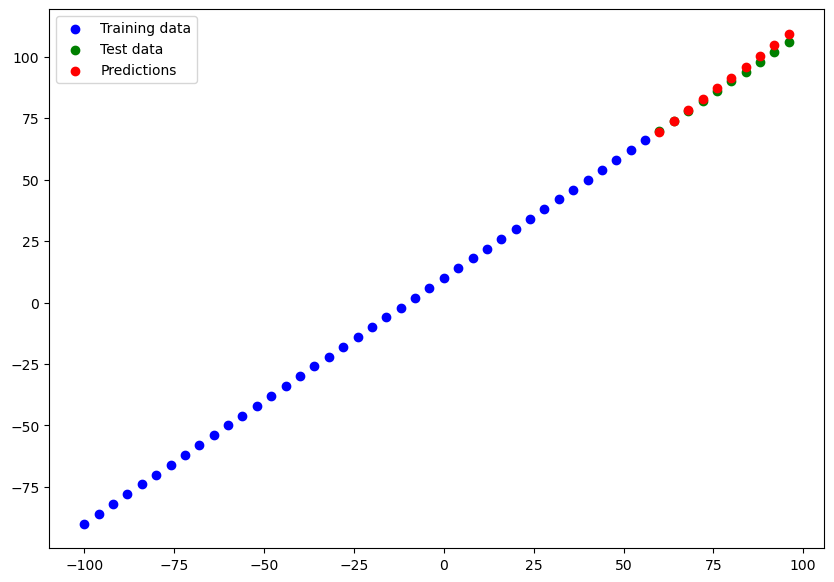

In [103]:
plot_pred(train_data=X_train,
         train_labels= y_train,
         test_data= X_test,
         test_labels= y_test,
         predictions= y_pred)

### Evaluation our model prediction with regression evaluation metrics

>* MAE
>* MSE

In [104]:
# Evaluate the model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 20s 20s/step - loss: 1.5326 - mae: 1.5326


[1.5325698852539062, 1.5325698852539062]

In [109]:
# calculate the MAE
mae = tf.metrics.mean_absolute_error(y_test, y_pred)

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.678772, 14.982117, 12.310608, 10.66508 , 10.      , 10.315371,
       11.611188, 13.887457, 17.144176, 21.38134 ], dtype=float32)>

In [108]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.32123 ],
       [ 73.772354],
       [ 78.22348 ],
       [ 82.6746  ],
       [ 87.125725],
       [ 91.57685 ],
       [ 96.02797 ],
       [100.479095],
       [104.93022 ],
       [109.38134 ]], dtype=float32)>

In [110]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [113]:
# let recalculate our mean absolute error as the shape of the y_pred is not the same with y_test

mae_recalc = tf.metrics.mean_absolute_error(y_true = y_test, 
                                            y_pred = tf.squeeze(y_pred))

mae_recalc

<tf.Tensor: shape=(), dtype=float32, numpy=1.5325699>

In [179]:
# calculate the means square error


mae_square = tf.metrics.mean_squared_error(
    y_true = y_test,
    y_pred = tf.squeeze(y_pred)
)

mae_square

<tf.Tensor: shape=(), dtype=float32, numpy=3.504953>

In [180]:
# make some function to reuse MAE and MSE
def mae (y_true, y_pred): 
    return tf.metrics.mean_absolute_error(y_true = y_test, 
                                            y_pred = (y_pred))



def mse_square (y_true, y_pred):
    return tf.metrics.mean_squared_error(
    y_true = y_test,
    y_pred = (y_pred)
    )

In [181]:
mae( y_true = y_test, y_pred = y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.678772, 14.982117, 12.310608, 10.66508 , 10.      , 10.315371,
       11.611188, 13.887457, 17.144176, 21.38134 ], dtype=float32)>

### Running experiment to improve our model

In [182]:
tf.random.set_seed(42)

# create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 23s 16ms/step - loss: 69.9079 - mae: 69.9079
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 34.6964 - mae: 34.6964
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 9.0286 - mae: 9.0286
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 10.9936 - mae: 10.9936
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 12.1378 - mae: 12.1378
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.3938 - mae: 9.3938
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 8.5425 - mae: 8.5425
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 9.0602 - mae: 9.0602
Epoch 9/100
2/2 [==============================] - 0s 18ms/step - loss: 18.6460 - mae: 18.6460
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 10.0691 - mae: 10.0691
Epoch 11/100
2/2 [==============================] - 0s 1

2/2 [==============================] - 0s 14ms/step - loss: 12.0646 - mae: 12.0646
Epoch 88/100
2/2 [==============================] - 0s 13ms/step - loss: 10.6858 - mae: 10.6858
Epoch 89/100
2/2 [==============================] - 0s 12ms/step - loss: 7.2876 - mae: 7.2876
Epoch 90/100
2/2 [==============================] - 0s 13ms/step - loss: 12.8290 - mae: 12.8290
Epoch 91/100
2/2 [==============================] - 0s 12ms/step - loss: 7.5031 - mae: 7.5031
Epoch 92/100
2/2 [==============================] - 0s 11ms/step - loss: 6.7699 - mae: 6.7699
Epoch 93/100
2/2 [==============================] - 0s 10ms/step - loss: 11.9788 - mae: 11.9788
Epoch 94/100
2/2 [==============================] - 0s 11ms/step - loss: 8.9088 - mae: 8.9088
Epoch 95/100
2/2 [==============================] - 0s 12ms/step - loss: 7.7462 - mae: 7.7462
Epoch 96/100
2/2 [==============================] - 0s 10ms/step - loss: 6.7707 - mae: 6.7707
Epoch 97/100
2/2 [==============================] - 0s 14ms/step 

1/1 [==============================] - 20s 20s/step


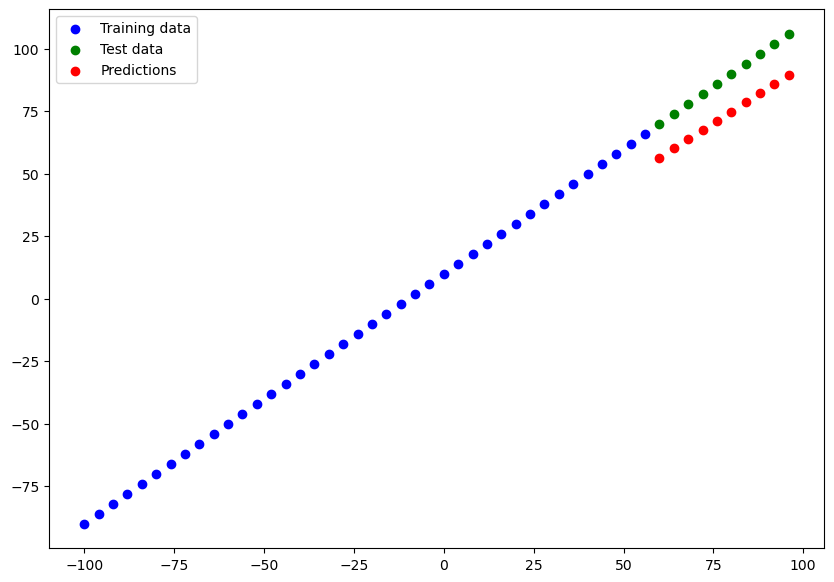

In [184]:
# make and plot model_1

y_pred_1 = model_1.predict(X_test)
plot_pred(predictions = y_pred_1)

In [185]:
# calculate model_1 evaluation metrics
mae_1 = mae(y_test,tf.squeeze(y_pred_1))
mse_1 = mse_square(y_test, tf.squeeze(y_pred_1))

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.994664>,
 <tf.Tensor: shape=(), dtype=float32, numpy=225.69211>)

In [186]:
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

# compile the model
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mse']
)

# fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 250)

Epoch 1/250
2/2 [==============================] - 25s 36ms/step - loss: 16.6149 - mse: 843.0373
Epoch 2/250
2/2 [==============================] - 0s 37ms/step - loss: 35.1698 - mse: 1627.9816
Epoch 3/250
2/2 [==============================] - 0s 13ms/step - loss: 37.7362 - mse: 2211.8669
Epoch 4/250
2/2 [==============================] - 0s 13ms/step - loss: 19.0219 - mse: 507.0074
Epoch 5/250
2/2 [==============================] - 0s 12ms/step - loss: 24.4641 - mse: 889.8446
Epoch 6/250
2/2 [==============================] - 0s 12ms/step - loss: 11.6101 - mse: 153.4222
Epoch 7/250
2/2 [==============================] - 0s 20ms/step - loss: 12.7629 - mse: 219.0290
Epoch 8/250
2/2 [==============================] - 0s 14ms/step - loss: 11.2006 - mse: 155.1143
Epoch 9/250
2/2 [==============================] - 0s 15ms/step - loss: 40.9863 - mse: 2649.6880
Epoch 10/250
2/2 [==============================] - 0s 16ms/step - loss: 28.3172 - mse: 1130.5175
Epoch 11/250
2/2 [================

2/2 [==============================] - 0s 27ms/step - loss: 14.9099 - mse: 310.7841
Epoch 86/250
2/2 [==============================] - 0s 16ms/step - loss: 15.2393 - mse: 314.1045
Epoch 87/250
2/2 [==============================] - 0s 15ms/step - loss: 19.0213 - mse: 517.3165
Epoch 88/250
2/2 [==============================] - 0s 16ms/step - loss: 30.0430 - mse: 1307.6727
Epoch 89/250
2/2 [==============================] - 0s 19ms/step - loss: 10.1887 - mse: 123.9326
Epoch 90/250
2/2 [==============================] - 0s 22ms/step - loss: 21.7153 - mse: 676.0156
Epoch 91/250
2/2 [==============================] - 0s 19ms/step - loss: 10.6016 - mse: 160.6413
Epoch 92/250
2/2 [==============================] - 0s 15ms/step - loss: 18.5767 - mse: 473.8619
Epoch 93/250
2/2 [==============================] - 0s 13ms/step - loss: 8.1560 - mse: 104.4713
Epoch 94/250
2/2 [==============================] - 0s 12ms/step - loss: 11.3719 - mse: 168.3813
Epoch 95/250
2/2 [=========================

2/2 [==============================] - 0s 11ms/step - loss: 22.5289 - mse: 784.6668
Epoch 170/250
2/2 [==============================] - 0s 14ms/step - loss: 10.1575 - mse: 195.7430
Epoch 171/250
2/2 [==============================] - 0s 15ms/step - loss: 18.0614 - mse: 504.1016
Epoch 172/250
2/2 [==============================] - 0s 12ms/step - loss: 28.8018 - mse: 1302.2859
Epoch 173/250
2/2 [==============================] - 0s 26ms/step - loss: 16.5008 - mse: 430.8979
Epoch 174/250
2/2 [==============================] - 0s 18ms/step - loss: 11.2166 - mse: 199.8243
Epoch 175/250
2/2 [==============================] - 0s 22ms/step - loss: 27.5928 - mse: 1098.4221
Epoch 176/250
2/2 [==============================] - 0s 19ms/step - loss: 8.2618 - mse: 77.4053
Epoch 177/250
2/2 [==============================] - 0s 15ms/step - loss: 9.2546 - mse: 108.8395
Epoch 178/250
2/2 [==============================] - 0s 11ms/step - loss: 18.1159 - mse: 464.7500
Epoch 179/250
2/2 [================

1/1 [==============================] - 23s 23s/step


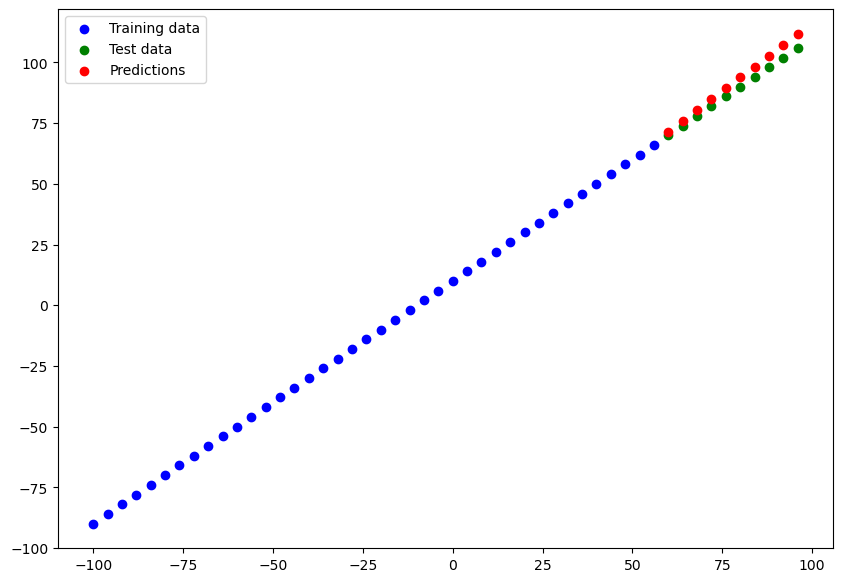

In [187]:
# make and plot model_1

y_pred_2 = model_2.predict(X_test)
plot_pred(predictions = y_pred_2)

In [188]:
# calculate model_2 evaluation
mae_2 = mae(y_test,tf.squeeze(y_pred_2))
mse_2 = mse_square(y_test, tf.squeeze(y_pred_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.5426254>,
 <tf.Tensor: shape=(), dtype=float32, numpy=14.584844>)

In [189]:
### build model_3

tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)

])

# compile the model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mse']
)

# fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 250)

Epoch 1/250
2/2 [==============================] - 9s 25ms/step - loss: 33.6516 - mse: 1532.8558
Epoch 2/250
2/2 [==============================] - 0s 17ms/step - loss: 31.6470 - mse: 1354.3623
Epoch 3/250
2/2 [==============================] - 0s 52ms/step - loss: 29.7137 - mse: 1188.9207
Epoch 4/250
2/2 [==============================] - 0s 25ms/step - loss: 27.7243 - mse: 1032.8807
Epoch 5/250
2/2 [==============================] - 0s 18ms/step - loss: 25.7747 - mse: 893.4196
Epoch 6/250
2/2 [==============================] - 0s 12ms/step - loss: 23.8375 - mse: 762.1906
Epoch 7/250
2/2 [==============================] - 0s 15ms/step - loss: 21.8615 - mse: 639.0720
Epoch 8/250
2/2 [==============================] - 0s 16ms/step - loss: 19.8502 - mse: 522.0649
Epoch 9/250
2/2 [==============================] - 0s 17ms/step - loss: 17.9658 - mse: 429.3007
Epoch 10/250
2/2 [==============================] - 0s 9ms/step - loss: 16.1445 - mse: 345.4875
Epoch 11/250
2/2 [==================

2/2 [==============================] - 0s 7ms/step - loss: 6.1313 - mse: 54.7054
Epoch 88/250
2/2 [==============================] - 0s 8ms/step - loss: 6.0874 - mse: 53.9734
Epoch 89/250
2/2 [==============================] - 0s 10ms/step - loss: 6.0829 - mse: 52.9924
Epoch 90/250
2/2 [==============================] - 0s 11ms/step - loss: 6.0663 - mse: 52.4695
Epoch 91/250
2/2 [==============================] - 0s 10ms/step - loss: 6.0321 - mse: 52.6410
Epoch 92/250
2/2 [==============================] - 0s 9ms/step - loss: 5.9931 - mse: 52.7470
Epoch 93/250
2/2 [==============================] - 0s 9ms/step - loss: 5.9889 - mse: 53.0016
Epoch 94/250
2/2 [==============================] - 0s 10ms/step - loss: 5.9750 - mse: 53.1144
Epoch 95/250
2/2 [==============================] - 0s 8ms/step - loss: 5.9542 - mse: 52.3526
Epoch 96/250
2/2 [==============================] - 0s 7ms/step - loss: 5.9072 - mse: 51.4366
Epoch 97/250
2/2 [==============================] - 0s 7ms/step - los

2/2 [==============================] - 0s 7ms/step - loss: 3.5892 - mse: 18.7003
Epoch 174/250
2/2 [==============================] - 0s 6ms/step - loss: 3.5820 - mse: 19.1819
Epoch 175/250
2/2 [==============================] - 0s 8ms/step - loss: 3.5554 - mse: 18.6320
Epoch 176/250
2/2 [==============================] - 0s 8ms/step - loss: 3.4708 - mse: 17.7466
Epoch 177/250
2/2 [==============================] - 0s 10ms/step - loss: 3.4448 - mse: 17.5687
Epoch 178/250
2/2 [==============================] - 0s 10ms/step - loss: 3.3937 - mse: 17.0815
Epoch 179/250
2/2 [==============================] - 0s 13ms/step - loss: 3.3459 - mse: 16.1162
Epoch 180/250
2/2 [==============================] - 0s 10ms/step - loss: 3.3839 - mse: 15.4830
Epoch 181/250
2/2 [==============================] - 0s 8ms/step - loss: 3.2758 - mse: 15.2742
Epoch 182/250
2/2 [==============================] - 0s 9ms/step - loss: 3.2785 - mse: 16.1206
Epoch 183/250
2/2 [==============================] - 0s 8ms/

1/1 [==============================] - 10s 10s/step


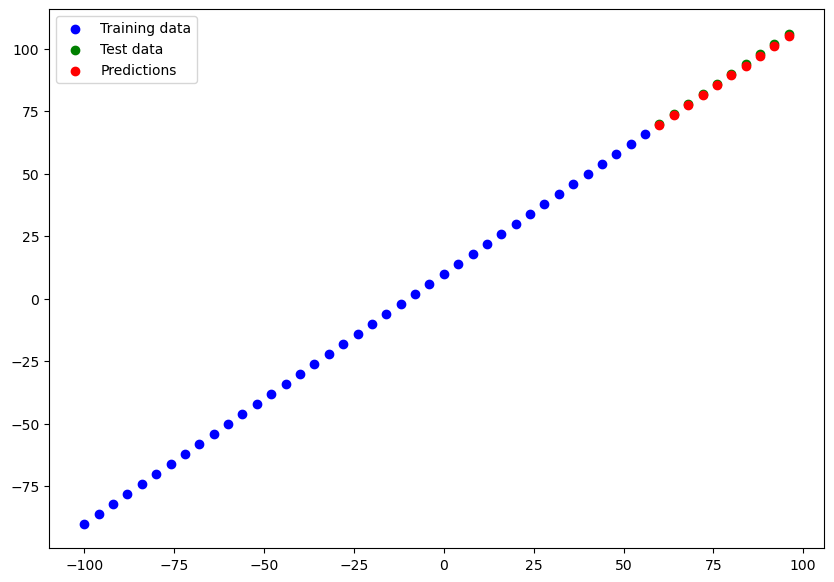

In [190]:
y_pred_3 = model_3.predict(X_test)
plot_pred(predictions = y_pred_3)

In [191]:
# calculate model_2 evaluation
mae_3 = mae(y_test,tf.squeeze(y_pred_3))
mse_3 = mse_square(y_test, tf.squeeze(y_pred_3))

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.6509697>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.43512973>)

###  Comparing the result of our experiments

> we've run a few experiment let's compare the result 

In [195]:
# lets compare our result using pandas

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_result = pd.DataFrame(model_results, columns = ["Model", "mae", "mse"])
all_result

,Model,mae,mse
0,model_1,14.994664,225.692108
1,model_2,3.542625,14.584844
2,model_3,0.650970,0.435130


In [196]:
# the best model is model 3
model_3.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 100)               200       
                                                                 
 dense_52 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###  **Note**
> one of your main goals should be to minimize the time
between your experiments. the more experiment you do, the more things you will figure out which dont work and in turn, get closer to figuring out what does work. Remember the machine learning practioner motto:
experimient, experimient, experimient

### Tracking your experiment
> one really good habit in machine learning modelling is to track the results of your experiment

> and when doing so, it can be tadious if you re running lots of experiments

> luckily there are tools to help us

> **Resources** As you buid more models, you will want to look into using:
>* TensorBoard
>* Weights & Biases

### Save model 
> it allow to use outside the jupyter note

> There are two ways to save model in tensor
>* SaveModel Format
>* the HDF5 format

In [197]:
#save model
model_3.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [199]:
# load the file back 
loaded_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_model


In [200]:
loaded_model.summary()


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 100)               200       
                                                                 
 dense_52 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [201]:
# Save model using the HDF5
model_3.save("best_model_SavedModel_format.h5")


C:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
